# Part 3

## Most Impactful Statistics via Borutashap

C: FG Attempted, 2Pts Attempted, 2Pt %, Avg Blk, FG %

PG: FG%, 2PT%, TOV, 2PTs Attempted, Avg PTS/Assists

PF: Avg Assists, Avg Free Throws Attempted, Avg 2Pts Attempted, Avg ORB, Avg 2P

SF: FG%, Avg PF, Avg DRB, Avg Assists, Avg 2Pts Attempted

SG: Avg FG%, Avg 2Pts Attempted, Avg 2PT%, Avg FG%, Avg FG Attempted

In [1]:
using CSV, Tables, LinearAlgebra, Random, Gurobi, JuMP, DataFrames, CategoricalArrays, Statistics

In [77]:
data = CSV.read("OneHotData.csv", DataFrame, pool=true)[:,2:end];
predictedSal = Array(CSV.read("results.csv", DataFrame));

In [78]:
# Function to scale a 1D array to the range [0, 1]
function scaleData(arr)
    min_val = minimum(arr)
    max_val = maximum(arr)
    return (arr .- min_val) / (max_val - min_val)
end


# Standardize the specified column
predictedSalScaled = scaleData(predictedSal);

In [73]:
FGpct = data[:,17]
FGA = data[:,16]
X2P = data[:,21]
X2PA = data[:,22]
X2Ppct = data[:,23]
BLK = data[:,32]
TOV = data[:,34] #Bad
PTS = data[:,36]
AST = data[:,31]
FTA = data[:, 26]
ORB = data[:,28]
PFA = data[:,35] #Bad
DRB = data[:,29];

In [74]:
C = data[:,2]
PF = data[:,3]
PG = data[:,4]
SF = data[:,6]
SG = data[:, 9];

In [117]:
function createTeam(lambda)
    TeamPicker = Model(optimizer_with_attributes(Gurobi.Optimizer, "OutputFlag" => 0));
    n = size(data, 1)
    @variable(TeamPicker, z[i = 1:n], Bin)
    
    # Minimize cost and negative stats * positions
    # NEED TO ADD LAMBDA VALUES HERE ETC LATER ON ONCE WORKING
    @objective(TeamPicker, Min, sum(lambda*z[i]*predictedSal[i] - # is the minus here correct? bc we want to maximimze so you subtract
                                    (1-lambda)*z[i]*((C[i]*(FGA[i] + X2PA[i] + X2Ppct[i] + BLK[i] + FGpct[i])) +
                                         (PG[i] * (FGpct[i] + X2Ppct[i] - TOV[i] + X2PA[i] + AST[i])) +
                                         (PF[i] * (AST[i] + FTA[i] + X2PA[i] + ORB[i] + X2P[i])) +
                                         (SF[i] * (FGpct[i] + DRB[i] + AST[i] + X2PA[i])) +
                                         (SG[i] * (FGpct[i] + X2PA[i] + X2Ppct[i] + FGpct[i] + FGA[i]))) for i in 1:n))
    
    @constraint(TeamPicker, sum(z[i] for i in 1:size(data, 1)) == 12) # we want 12 players on our team
    
    # how do we control for having a certain amount of centers, pf, pg etc?
    @constraint(TeamPicker, sum(z[i] * C[i] for i in 1:size(data, 1)) == 2) # I think this would work
    @constraint(TeamPicker, sum(z[i] * PF[i] for i in 1:size(data, 1)) == 3) # I think this would work
    @constraint(TeamPicker, sum(z[i] * PG[i] for i in 1:size(data, 1)) == 3) # I think this would work
    @constraint(TeamPicker, sum(z[i] * SF[i] for i in 1:size(data, 1)) == 2) # I think this would work
    @constraint(TeamPicker, sum(z[i] * SG[i] for i in 1:size(data, 1)) == 2) # I think this would work
    
    optimize!(TeamPicker);

    return value.(z)
end;

In [118]:
10e8

1.0e9

In [150]:
#%%capture
# plot budget vs different lambda values
lambdas = 0:2.5e-7:10e-6
budgets = []
for lambda in lambdas
    totPrice = 0
    players = createTeam(lambda)
    for i in 1:n
        totPrice += players[i] * predictedSal[i]
    end
    push!(budgets, totPrice)
end;

Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-22
Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-22
Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-22
Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-22
Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-22
Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-22
Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-22
Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-22
Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-22
Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-22
Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-22

In [151]:
budgets

41-element Vector{Any}:
 3.69914532e8
 2.601855358359375e8
 1.717539203359375e8
 1.072561070859375e8
 6.98205590859375e7
 6.41327270859375e7
 6.32909380859375e7
 5.21590980703125e7
 4.68918904140625e7
 3.90847698671875e7
 2.78670106171875e7
 2.38588426171875e7
 2.11314783984375e7
 ⋮
 2.3903589296875e6
 2.3903589296875e6
 2.3903589296875e6
 2.3903589296875e6
 2.3903589296875e6
 2.3903589296875e6
 2.2449917109375e6
 2.2449917109375e6
 2.2449917109375e6
 2.2449917109375e6
 2.2449917109375e6
 2.2449917109375e6

In [127]:
# WE NEED TO STANDARDIZE 

In [152]:
lambdas

0.0:2.5e-7:1.0e-5

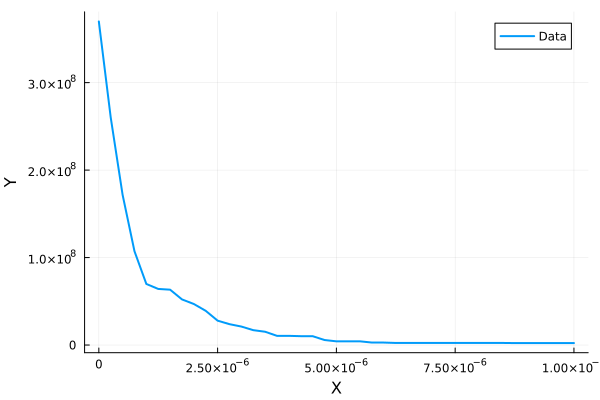

In [154]:
using Plots
plot(0.0:2.5e-7:1.0e-5, budgets, xlabel="X", ylabel="Y", label="Data", linewidth=2)